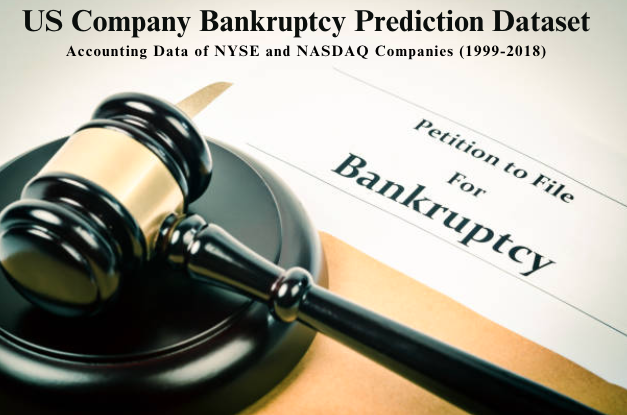

# Individual Project

## Goal:

The goal of this project was to build a predictive model to identify companies at risk of bankruptcy based on financial data. The dataset contained financial information from 8,262 American public companies listed on the New York Stock Exchange and NASDAQ, recorded during the period spanning from 1999 to 2018.

## Workflow
1. Import

2. Acquire Data

3. Clean, Prep & Split Data

4. Explore Data
    - Hypothesis Testing
    
5. Feature Importance

6. Modeling
    - Identify Baseline
    - Model on Train
    - Model on Validate
    - Model on Test

8. Conclusion

## Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np

# this is to open the dataset/download the keggal dataset
import opendatasets as od
import os

# time imports
from datetime import timedelta, datetime

# sklearn imports
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle as w
import explore as e
import modeling as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Acquire
- Data acquired from [Kaggle](https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv)
- Created a Github Gists link to provide a simple way of downloading the file.
    Downloaded .csv file: american_bankruptcy.csv
- It contained 78,682 rows and 21 columns before cleaning
    - 73,462 rows were alive
    - 5,220 rows were failed
- The dataset covers the period from 1999 to 2018 and includes accounting data from 8,262 distinct companies.
- Each row represents company status by year
- Each column represents financial indicators of these companies

## Prepare
- Did not remove any columns
- Did rename all X(num) columns to the appropiate name
- Checked for nulls - no null values found and created a columns for missing percentage
- Checked for unique values - created a columns in the summary dataframe to show the unique values
- Checked that column data types were appropriate
- Outliers: No outliers were removed
- Map categorical variables
- Split data into train, validate, and test (60/20/20)
- Scaled continuous variables

## Data Dictionary

| Variable Name            | Description                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------|
| X1                       | Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year. |
| X2                       | Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products.                                                        |
| X3                       | Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.  |
| X4                       | EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income. |
| X5                       | Inventory - The accounting of items and raw materials that a company either uses in production or sells.                                                       |
| X6                       | Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.                                        |
| X7                       | Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.                                |
| X8                       | Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market. |
| X9                       | Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.                                                                       |
| X10                      | Total assets - All the assets, or items of value, a business owns.                                                                                                 |
| X11                      | Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.                               |
| X12                      | EBIT - Earnings before interest and taxes.                                                                                                                         |
| X13                      | Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.               |
| X14                      | Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.       |
| X15                      | Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders. |
| X16                      | Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.     |
| X17                      | Total Liabilities - The combined debts and obligations that the company owes to outside parties.                                                                   |
| X18                      | Total Operating Expenses - The expenses a business incurs through its normal business operations.                                                                   |


In [2]:
url = 'https://gist.githubusercontent.com/rosendo-lugo/8138692acade48da91cf1c80687f0779/raw/american_bankruptcy.csv'

In [3]:
df = pd.read_csv(url)

## A summary of the data

In [4]:
w.data_summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max
company_name,object,0,0.0,8971,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_label,object,0,0.0,2,78682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,int64,0,0.0,20,78682.0,2007.506317,5.742768,1999.0,2002.0,2007.0,2012.0,2018.0
x1,float64,0,0.0,65895,78682.0,880.362485,3928.564794,-7.76,18.924,100.4495,431.52675,169662.0
x2,float64,0,0.0,65690,78682.0,1594.529029,8930.484664,-366.645,17.03825,103.661,634.548,374623.0
x3,float64,0,0.0,36010,78682.0,121.234256,652.376804,0.0,1.192,7.9295,47.97175,28430.0
x4,float64,0,0.0,59060,78682.0,376.759424,2012.023142,-21913.0,-0.811,15.0345,139.65525,81730.0
x5,float64,0,0.0,38898,78682.0,201.605717,1060.766096,0.0,0.0,7.023,74.74725,62567.0
x6,float64,0,0.0,55550,78682.0,129.382453,1265.532022,-98696.0,-7.41575,1.616,40.14425,104821.0
x7,float64,0,0.0,49577,78682.0,286.832743,1335.978571,-0.006,3.28125,22.82,131.5805,65812.0


## Prepare the DATA

In [5]:
df = w.prep_data(df)

In [6]:
df

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,1,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,1,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,1,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,1,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


## 

## Split the DATASET

In [7]:
target = 'status_label'

In [28]:
# baseline
df['baseline_pred'] = df.status_label.mode()[0]

In [27]:
# Define quartiles
Q1 = df['total_assets'].quantile(0.25)
Q3 = df['total_assets'].quantile(0.75)

# Create a new variable 'total_assets_size'
df['total_assets_size'] = ['low_assets' if x < Q1 else 'high_assets' if x >= Q3 else 'medium_assets' for x in df['total_assets']]

# Check the result
df.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,total_long_term_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,baseline_pred,total_assets_size
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1,medium_assets
1,C_1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1,medium_assets
2,C_1,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1,medium_assets
3,C_1,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1,medium_assets
4,C_1,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1,medium_assets


In [9]:
tr, val, ts = w.get_split(df)
tr.shape, val.shape, ts.shape

((47208, 20), (15737, 20), (15737, 20))

In [10]:
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)

In [11]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)

# Explore

### Exploring the distribution of Company Status and Year.

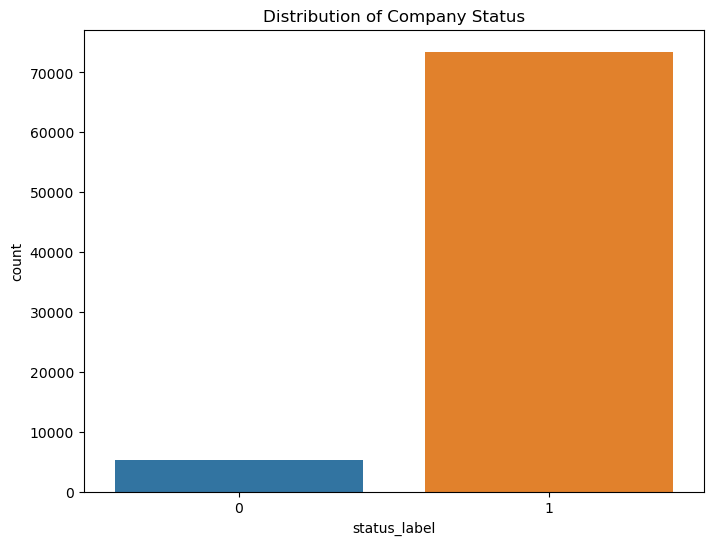

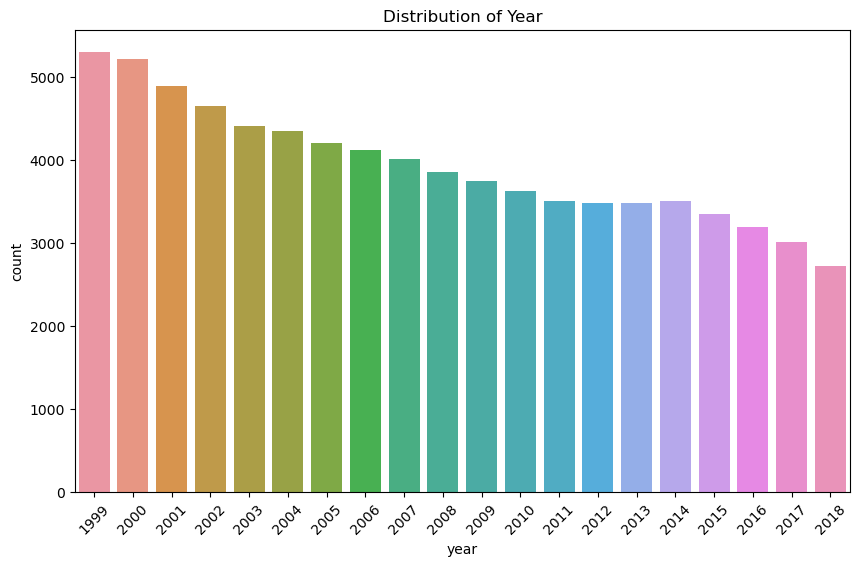

In [12]:
# Checking the distribution of 'status_label' column
plt.figure(figsize=(8, 6))
sns.countplot(x='status_label', data=df)
plt.title('Distribution of Company Status')
plt.show()

# Checking the distribution of 'year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Year')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Identifying numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

### Univariate exploration 

In [14]:
# sns.pairplot(df)

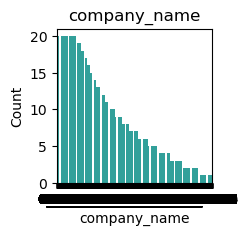

       company_name  Count  Percent
C_4081          C_1     20     0.03
C_6487          C_2     20     0.03
C_1153          C_3     20     0.03
C_4047          C_4     20     0.03
C_4056          C_5     20     0.03
...             ...    ...      ...
C_1498       C_8967      1     0.00
C_5908       C_8968      1     0.00
C_2814       C_8969      1     0.00
C_3997       C_8970      1     0.00
C_3408       C_8971      1     0.00

[8971 rows x 3 columns]
______________________________________________________________________________________


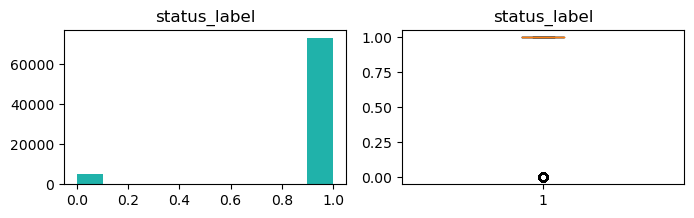

count    78682.000000
mean         0.933657
std          0.248882
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: status_label, dtype: float64
______________________________________________________________________________________


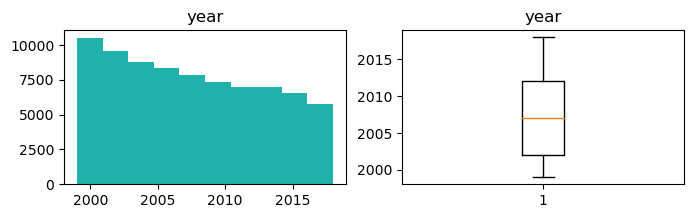

count    78682.000000
mean      2007.506317
std          5.742768
min       1999.000000
25%       2002.000000
50%       2007.000000
75%       2012.000000
max       2018.000000
Name: year, dtype: float64
______________________________________________________________________________________


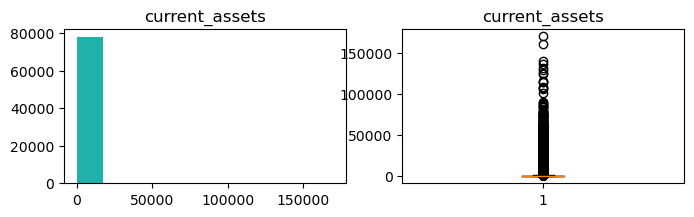

count     78682.000000
mean        880.362485
std        3928.564794
min          -7.760000
25%          18.924000
50%         100.449500
75%         431.526750
max      169662.000000
Name: current_assets, dtype: float64
______________________________________________________________________________________


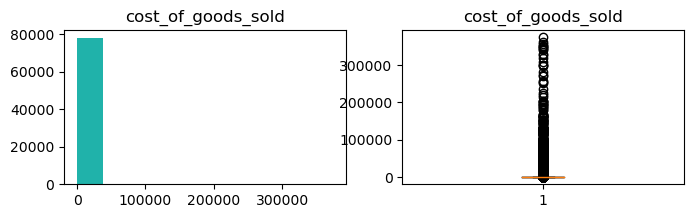

count     78682.000000
mean       1594.529029
std        8930.484664
min        -366.645000
25%          17.038250
50%         103.661000
75%         634.548000
max      374623.000000
Name: cost_of_goods_sold, dtype: float64
______________________________________________________________________________________


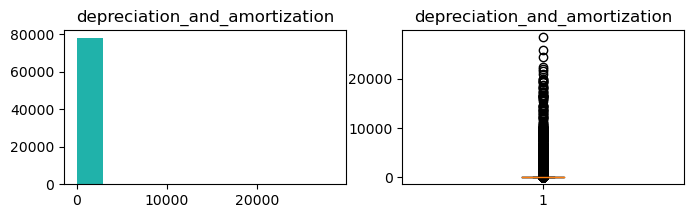

count    78682.000000
mean       121.234256
std        652.376804
min          0.000000
25%          1.192000
50%          7.929500
75%         47.971750
max      28430.000000
Name: depreciation_and_amortization, dtype: float64
______________________________________________________________________________________


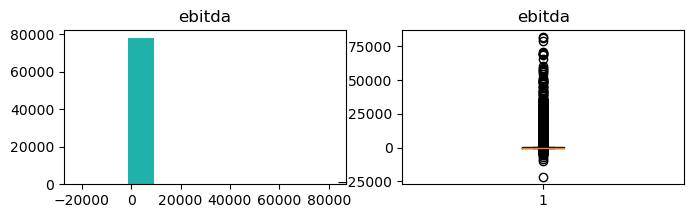

count    78682.000000
mean       376.759424
std       2012.023142
min     -21913.000000
25%         -0.811000
50%         15.034500
75%        139.655250
max      81730.000000
Name: ebitda, dtype: float64
______________________________________________________________________________________


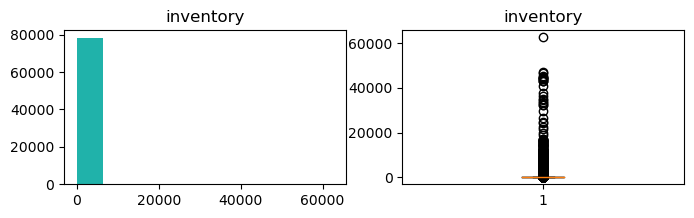

count    78682.000000
mean       201.605717
std       1060.766096
min          0.000000
25%          0.000000
50%          7.023000
75%         74.747250
max      62567.000000
Name: inventory, dtype: float64
______________________________________________________________________________________


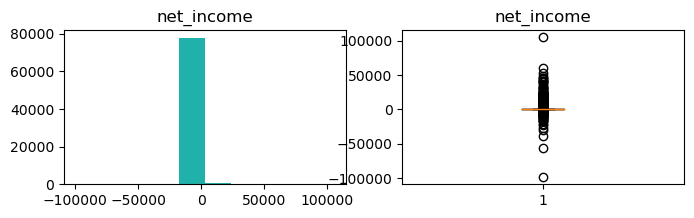

count     78682.000000
mean        129.382453
std        1265.532022
min      -98696.000000
25%          -7.415750
50%           1.616000
75%          40.144250
max      104821.000000
Name: net_income, dtype: float64
______________________________________________________________________________________


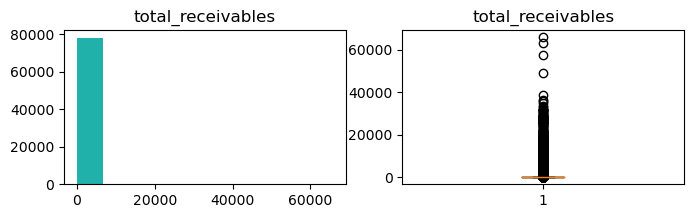

count    78682.000000
mean       286.832743
std       1335.978571
min         -0.006000
25%          3.281250
50%         22.820000
75%        131.580500
max      65812.000000
Name: total_receivables, dtype: float64
______________________________________________________________________________________


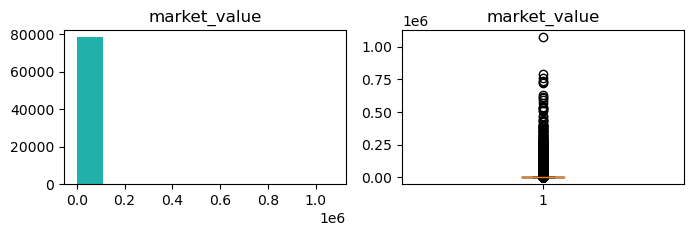

count    7.868200e+04
mean     3.414355e+03
std      1.841410e+04
min      1.000000e-04
25%      3.498000e+01
50%      2.275118e+02
75%      1.244890e+03
max      1.073391e+06
Name: market_value, dtype: float64
______________________________________________________________________________________


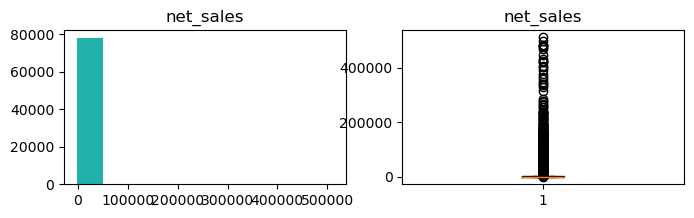

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: net_sales, dtype: float64
______________________________________________________________________________________


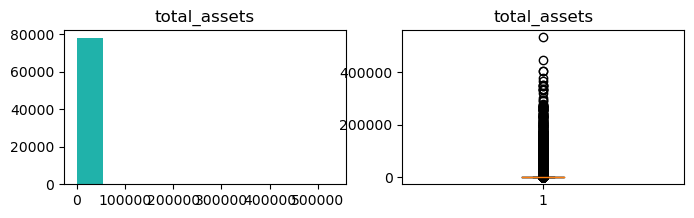

count     78682.000000
mean       2867.110620
std       12917.944421
min           0.001000
25%          37.363500
50%         213.203500
75%        1171.364750
max      531864.000000
Name: total_assets, dtype: float64
______________________________________________________________________________________


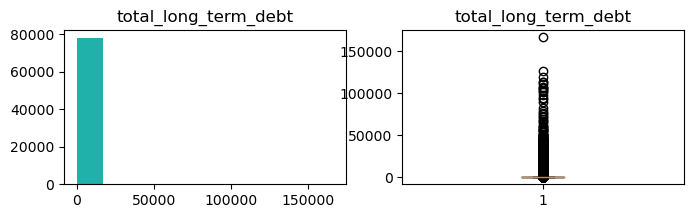

count     78682.000000
mean        722.483710
std        3242.170946
min          -0.023000
25%           0.000000
50%           7.593500
75%         248.760750
max      166250.000000
Name: total_long_term_debt, dtype: float64
______________________________________________________________________________________


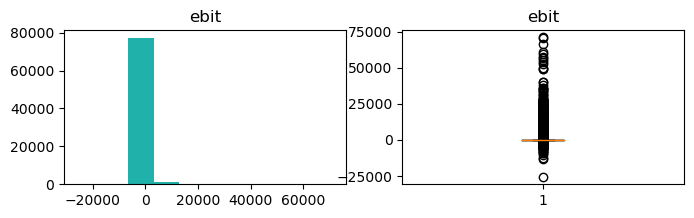

count    78682.000000
mean       255.525035
std       1494.643534
min     -25913.000000
25%         -2.787000
50%          6.518000
75%         87.599000
max      71230.000000
Name: ebit, dtype: float64
______________________________________________________________________________________


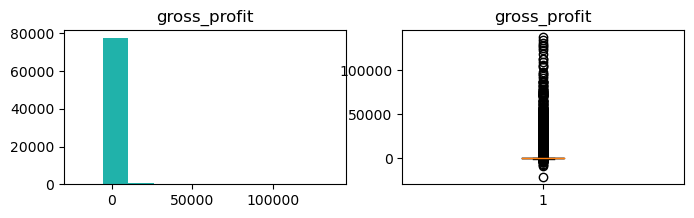

count     78682.000000
mean        769.490783
std        3774.703114
min      -21536.000000
25%           8.521250
50%          63.581500
75%         344.074250
max      137106.000000
Name: gross_profit, dtype: float64
______________________________________________________________________________________


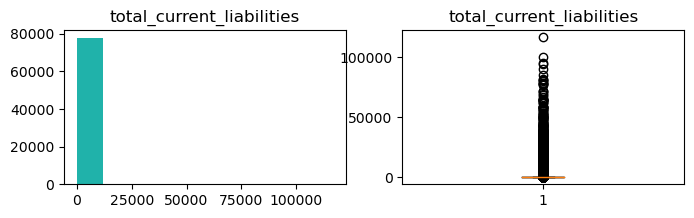

count     78682.000000
mean        610.072255
std        2938.387443
min           0.001000
25%           8.889250
50%          43.333000
75%         222.817000
max      116866.000000
Name: total_current_liabilities, dtype: float64
______________________________________________________________________________________


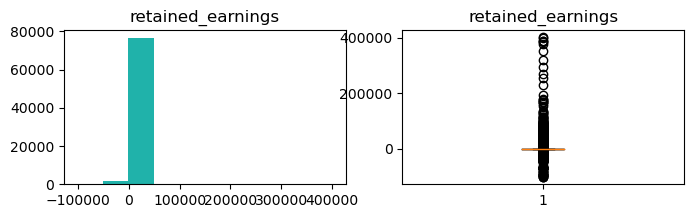

count     78682.000000
mean        532.467069
std        6369.159440
min     -102362.000000
25%         -68.282750
50%          -1.131000
75%         146.070000
max      402089.000000
Name: retained_earnings, dtype: float64
______________________________________________________________________________________


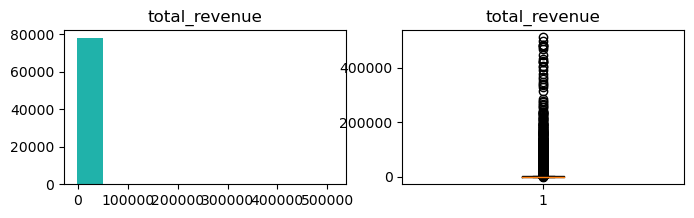

count     78682.000000
mean       2364.019706
std       11950.068842
min       -1964.999000
25%          27.548500
50%         186.598500
75%        1046.402500
max      511729.000000
Name: total_revenue, dtype: float64
______________________________________________________________________________________


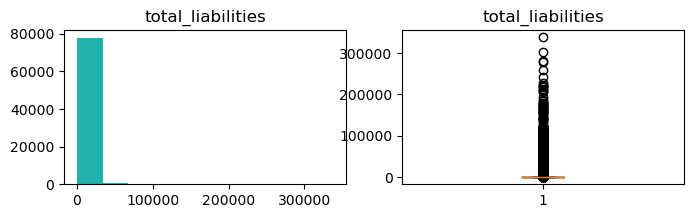

count     78682.000000
mean       1773.563963
std        8053.684902
min           0.001000
25%          13.486000
50%          81.988000
75%         629.975000
max      337980.000000
Name: total_liabilities, dtype: float64
______________________________________________________________________________________


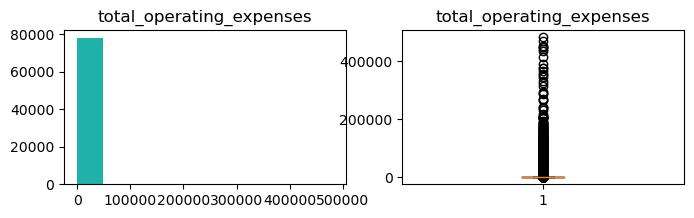

count     78682.000000
mean       1987.260307
std       10419.629038
min        -317.197000
25%          32.872500
50%         168.912000
75%         875.522250
max      481580.000000
Name: total_operating_expenses, dtype: float64
______________________________________________________________________________________


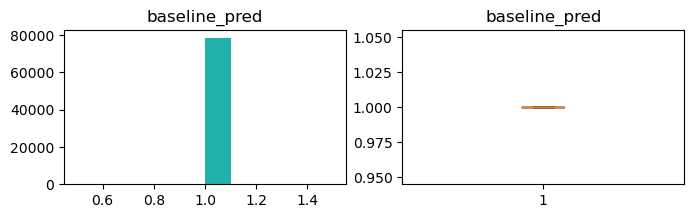

count    78682.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: baseline_pred, dtype: float64


In [15]:
# be patient it takes 24 seconds to run
e.explore_univariate(df, categorical_cols, numerical_cols)

## Bivariate exploration

## Correlation Matrix

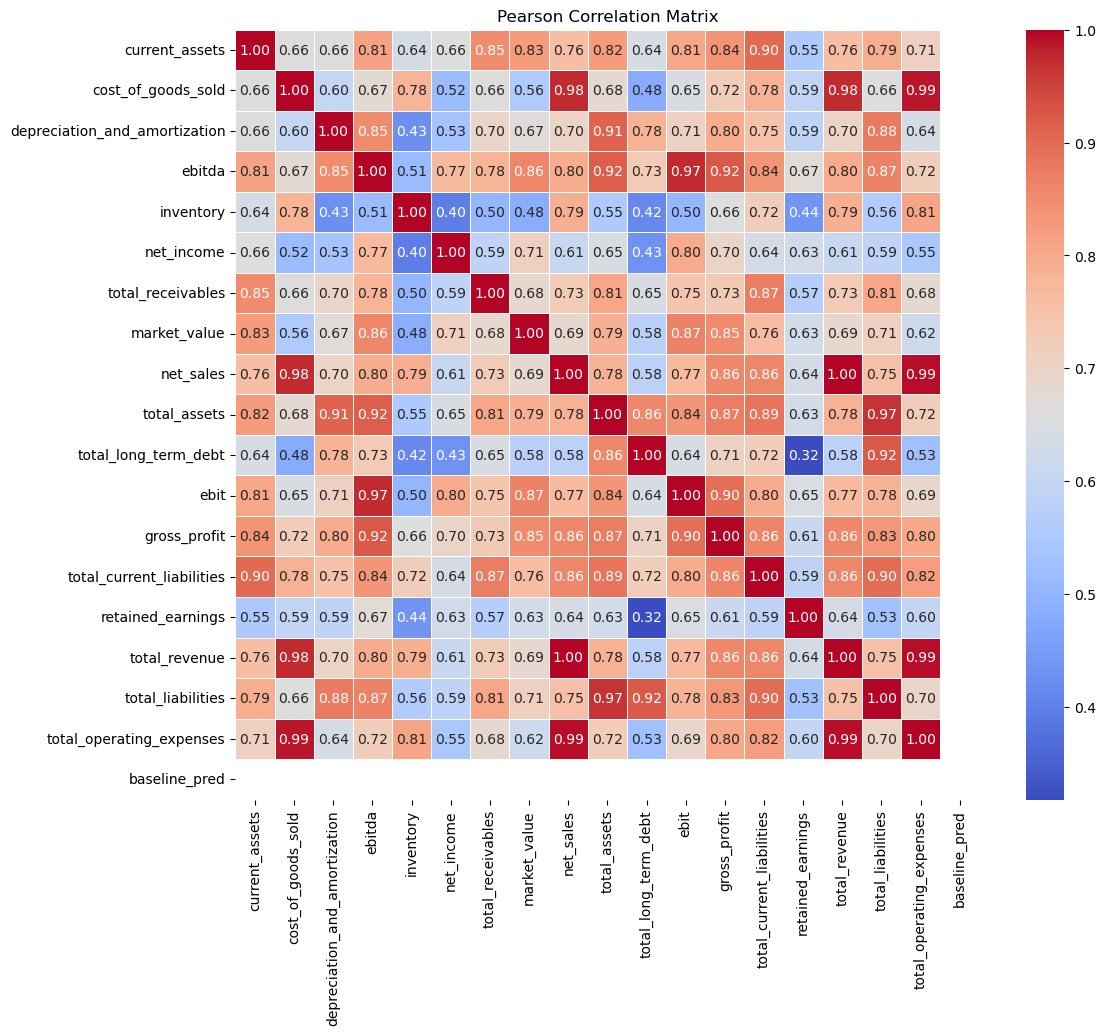

In [16]:
list_col = list(df.columns)
data = df[list_col[3:]]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')

plt.show()

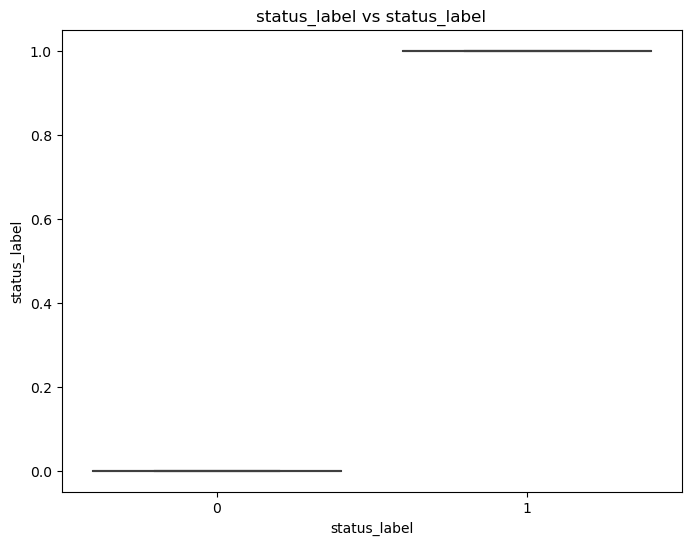

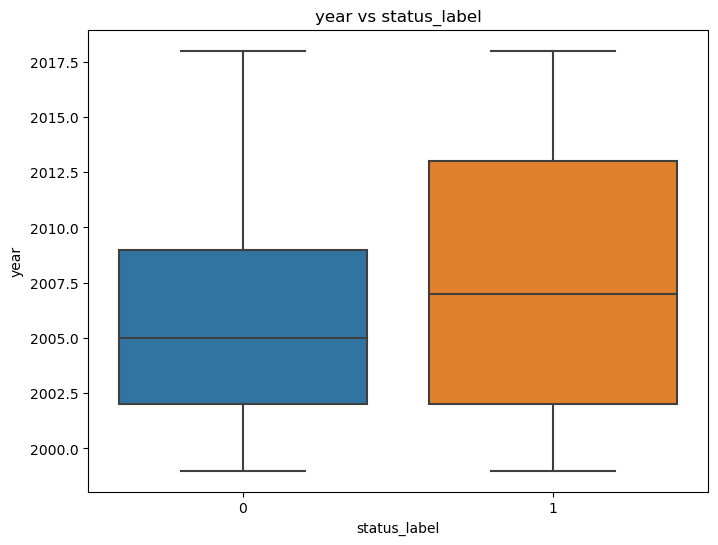

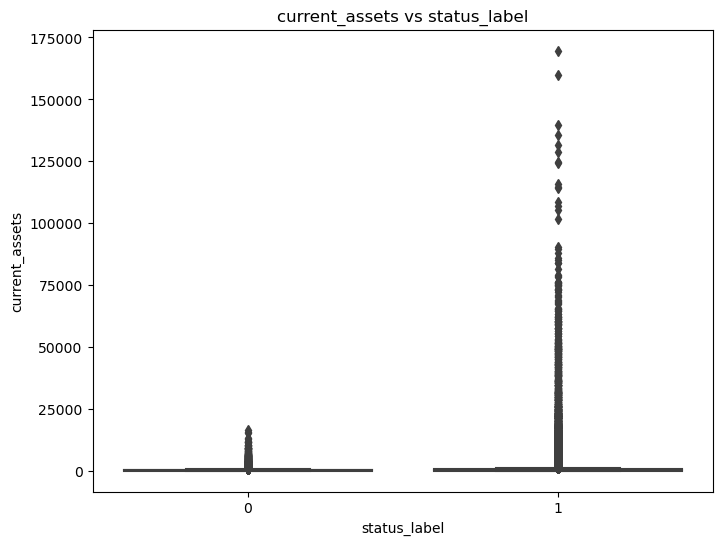

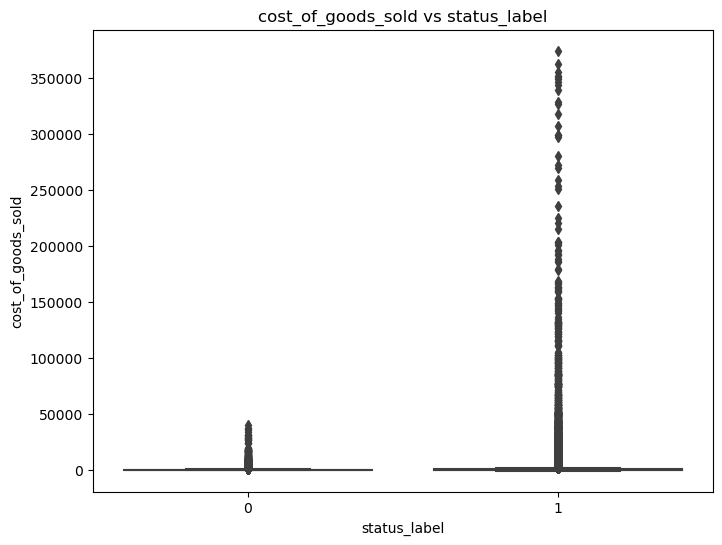

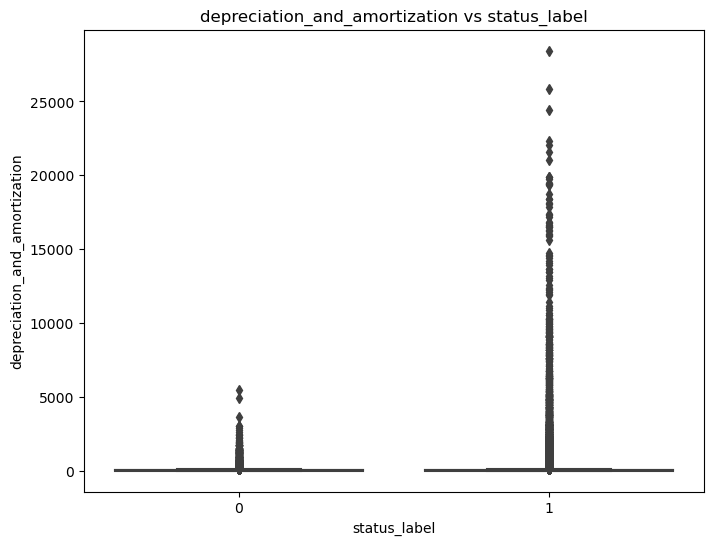

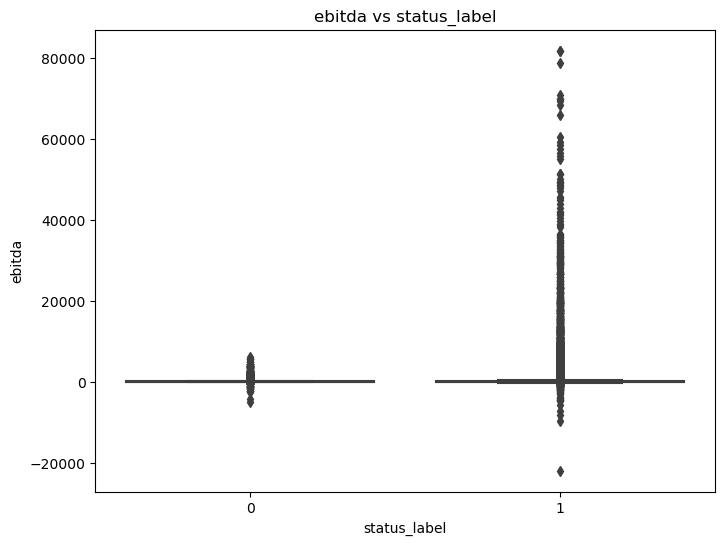

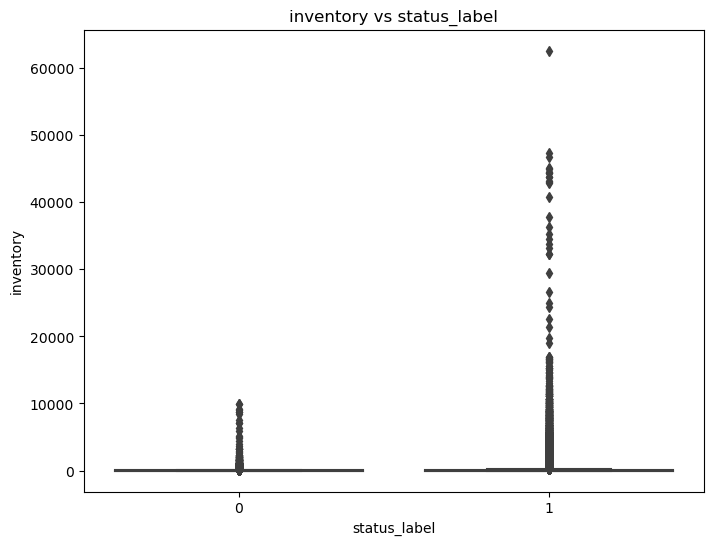

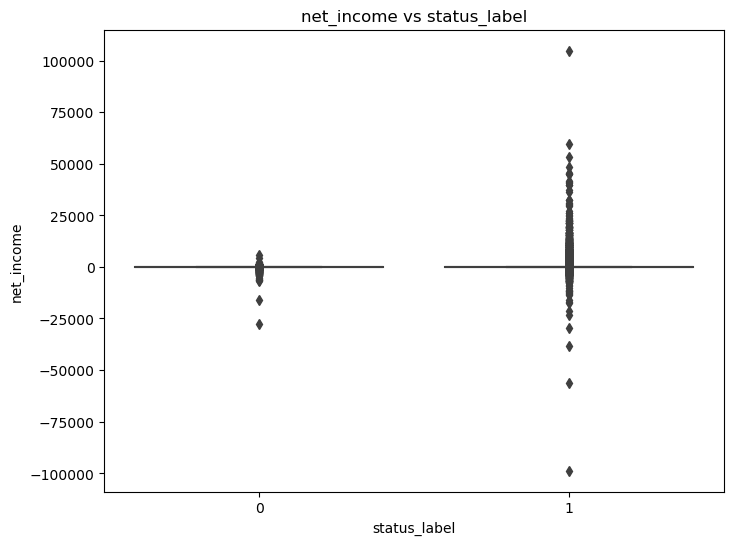

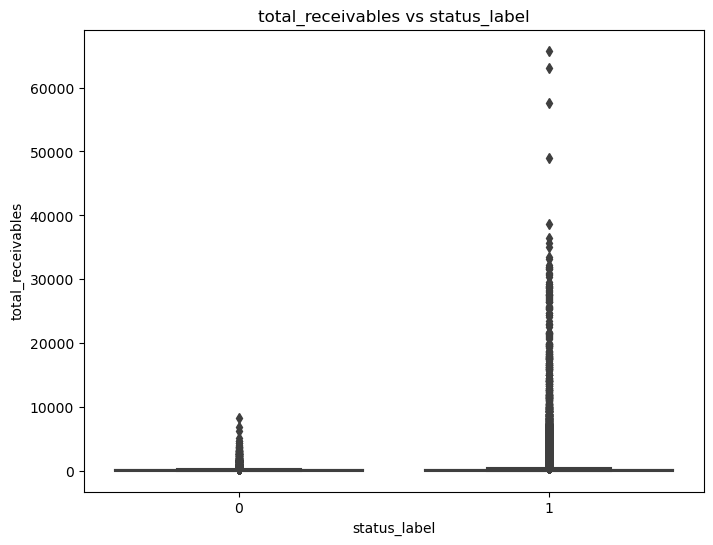

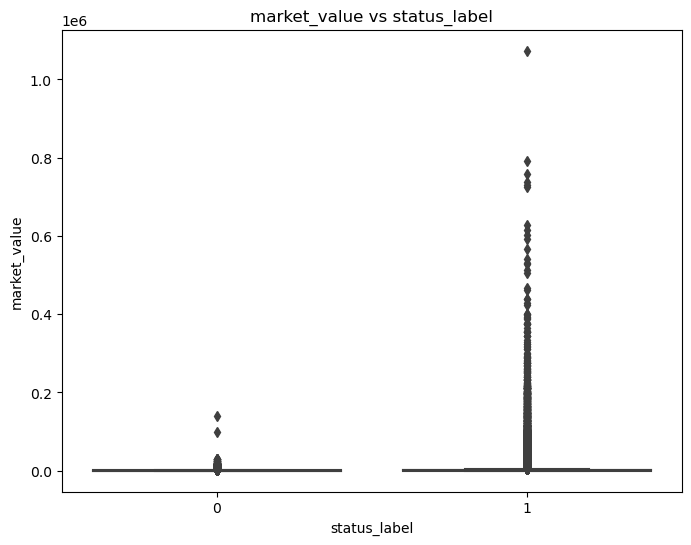

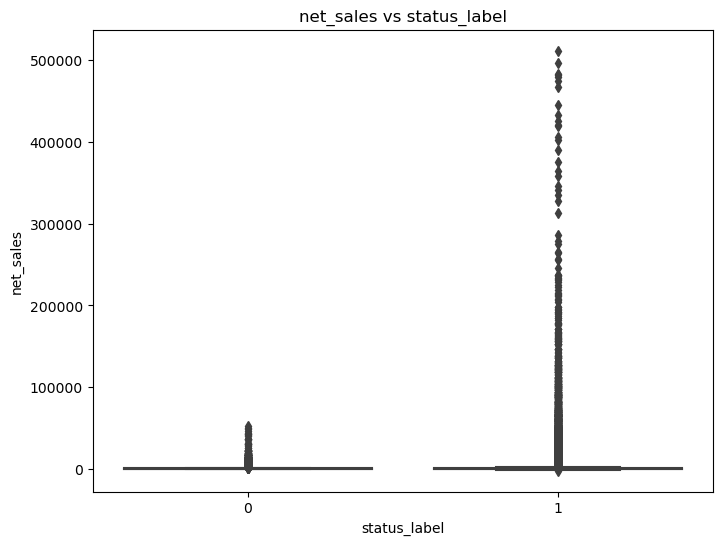

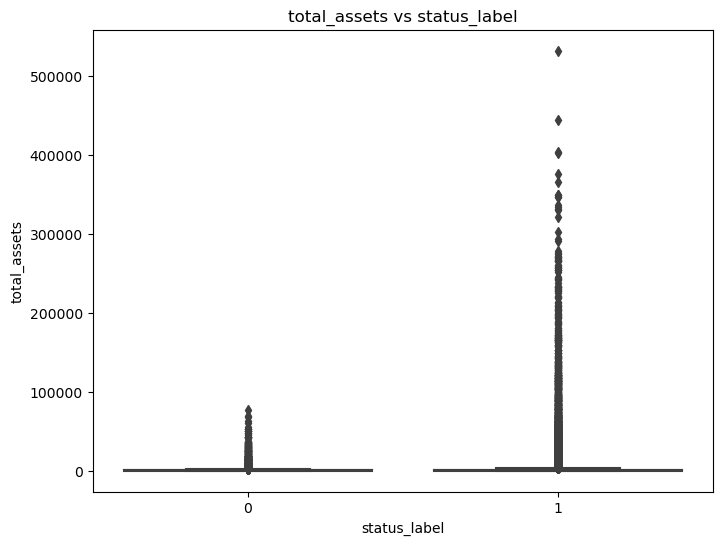

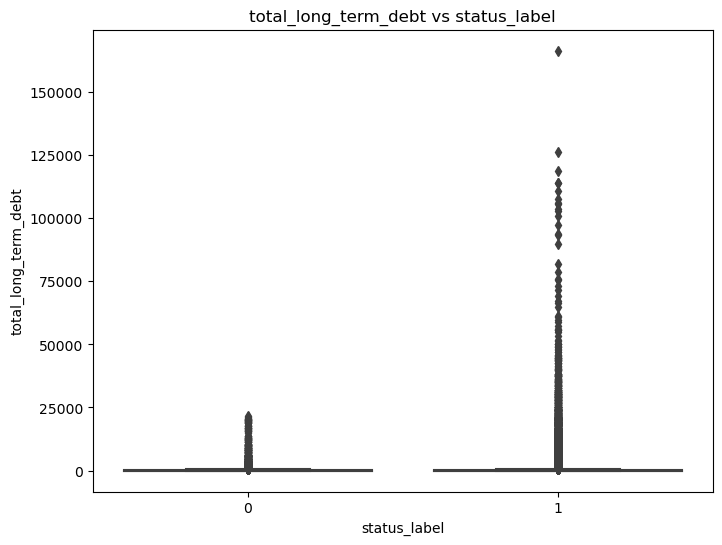

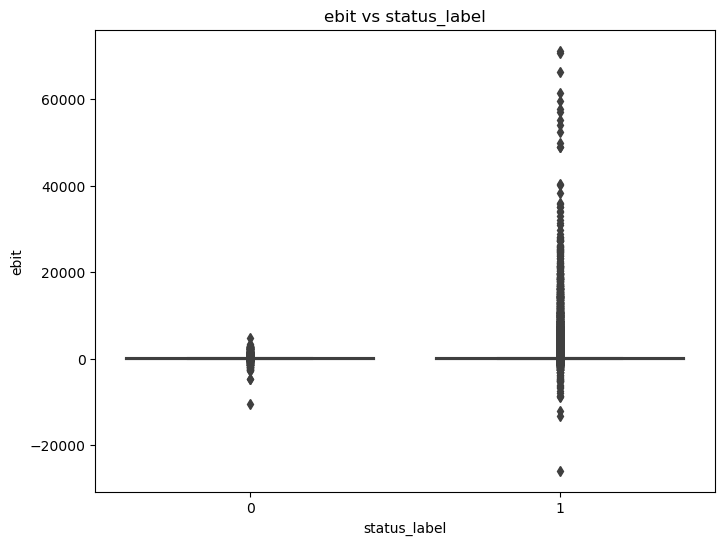

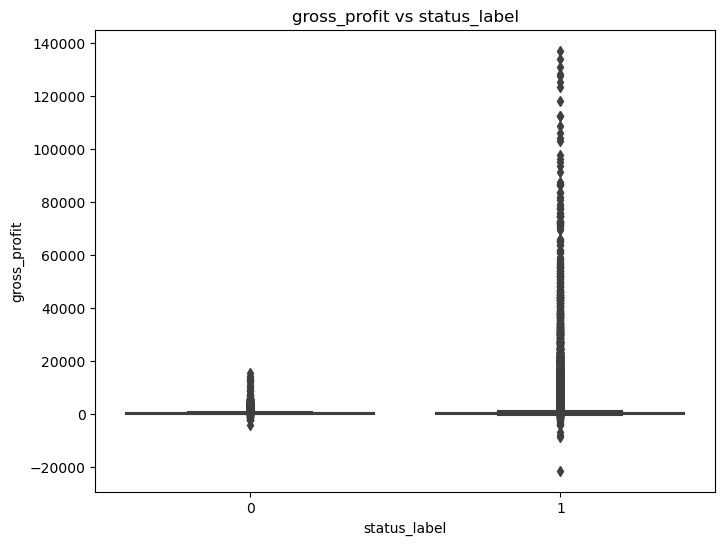

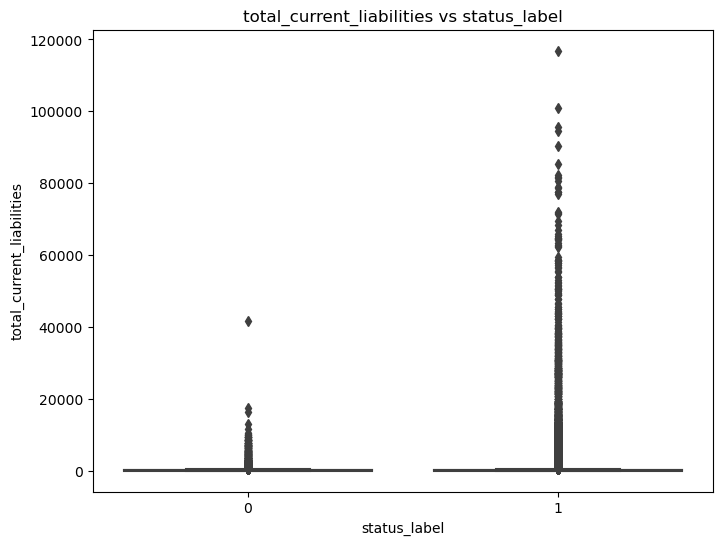

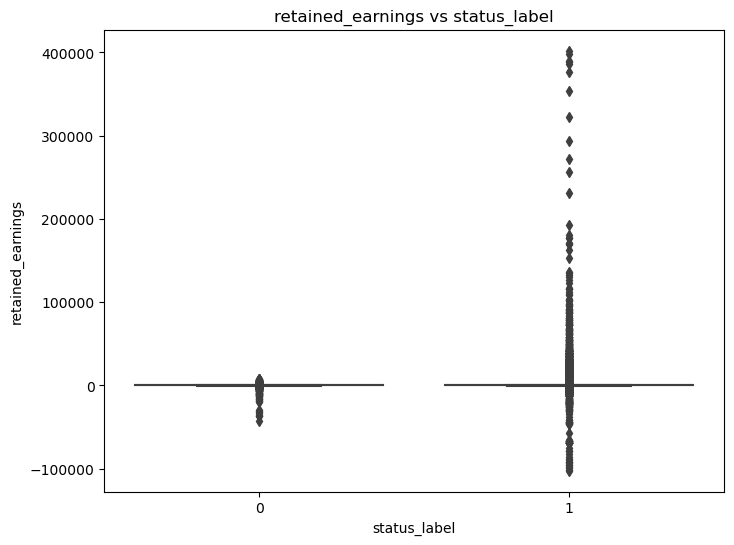

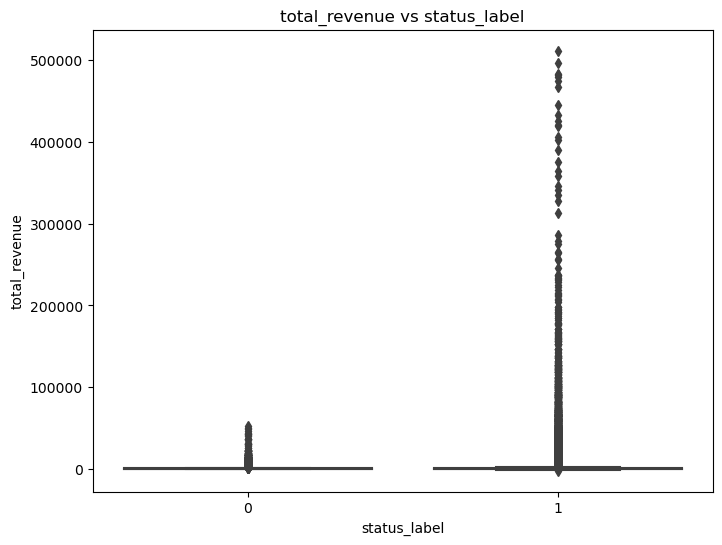

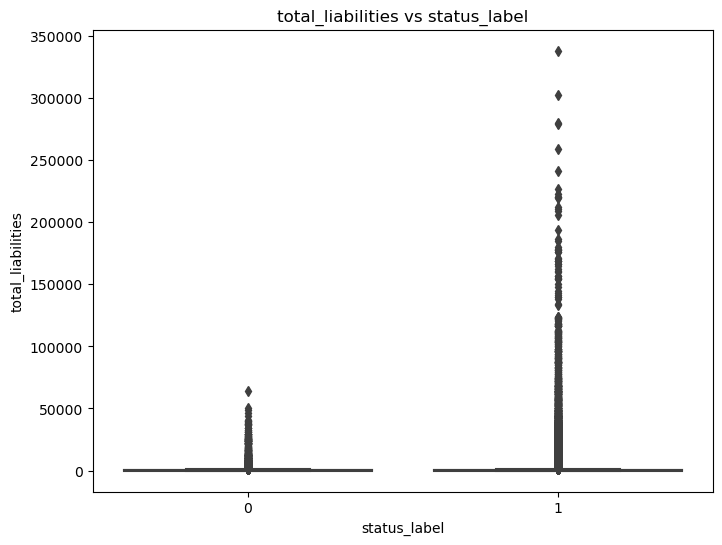

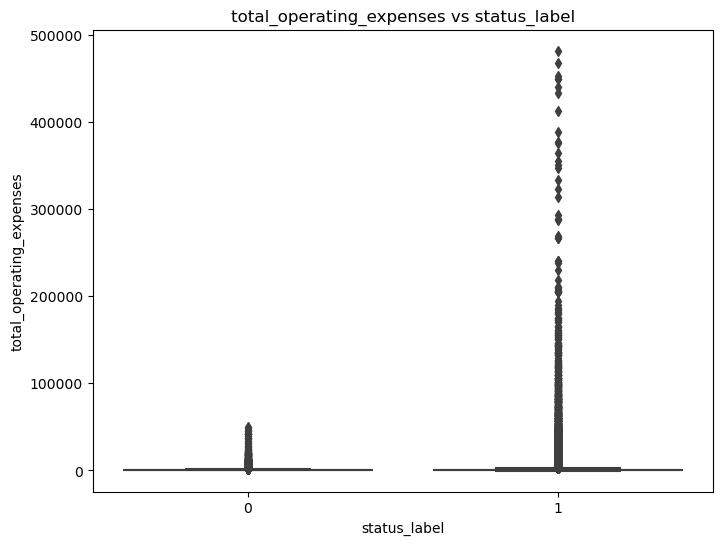

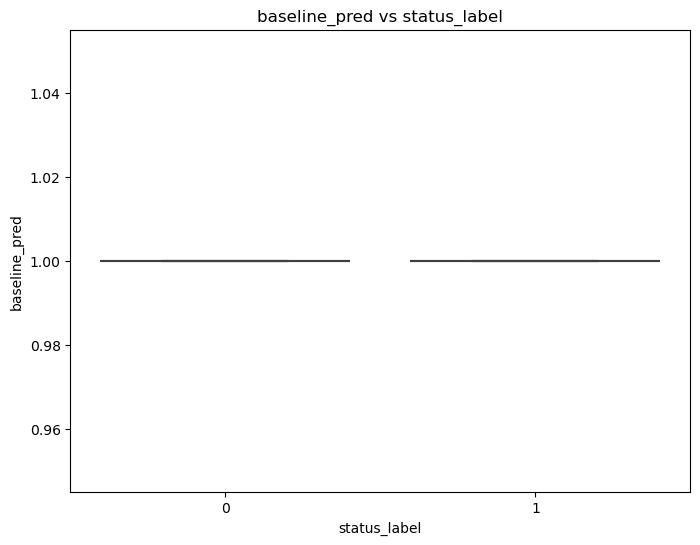

In [17]:
# Bivariate exploration: Plot each variable against your target

# For a categorical target variable, your target can be on the x-axis, and numeric variables on the y
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='status_label', y=col, data=df)
    plt.title(f'{col} vs status_label')
    plt.show()

# For a numeric target variable, your target can be on the y-axis, and independent variables on the x-axis
for col in categorical_cols:
    if df[col].nunique() < 10:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=col, y='status_label', data=df)
        plt.title(f'status_label vs {col}')
        plt.xticks(rotation=45)
        plt.show()

## Multivariate exploration

In [25]:
# With a categorical target, plot each categorical variable (x-axis) against each numeric variable (y-axis) and set color to your categorical target variable
cat_vars = tr.total_assets
quant_vars = e.get_numeric_cols(tr)

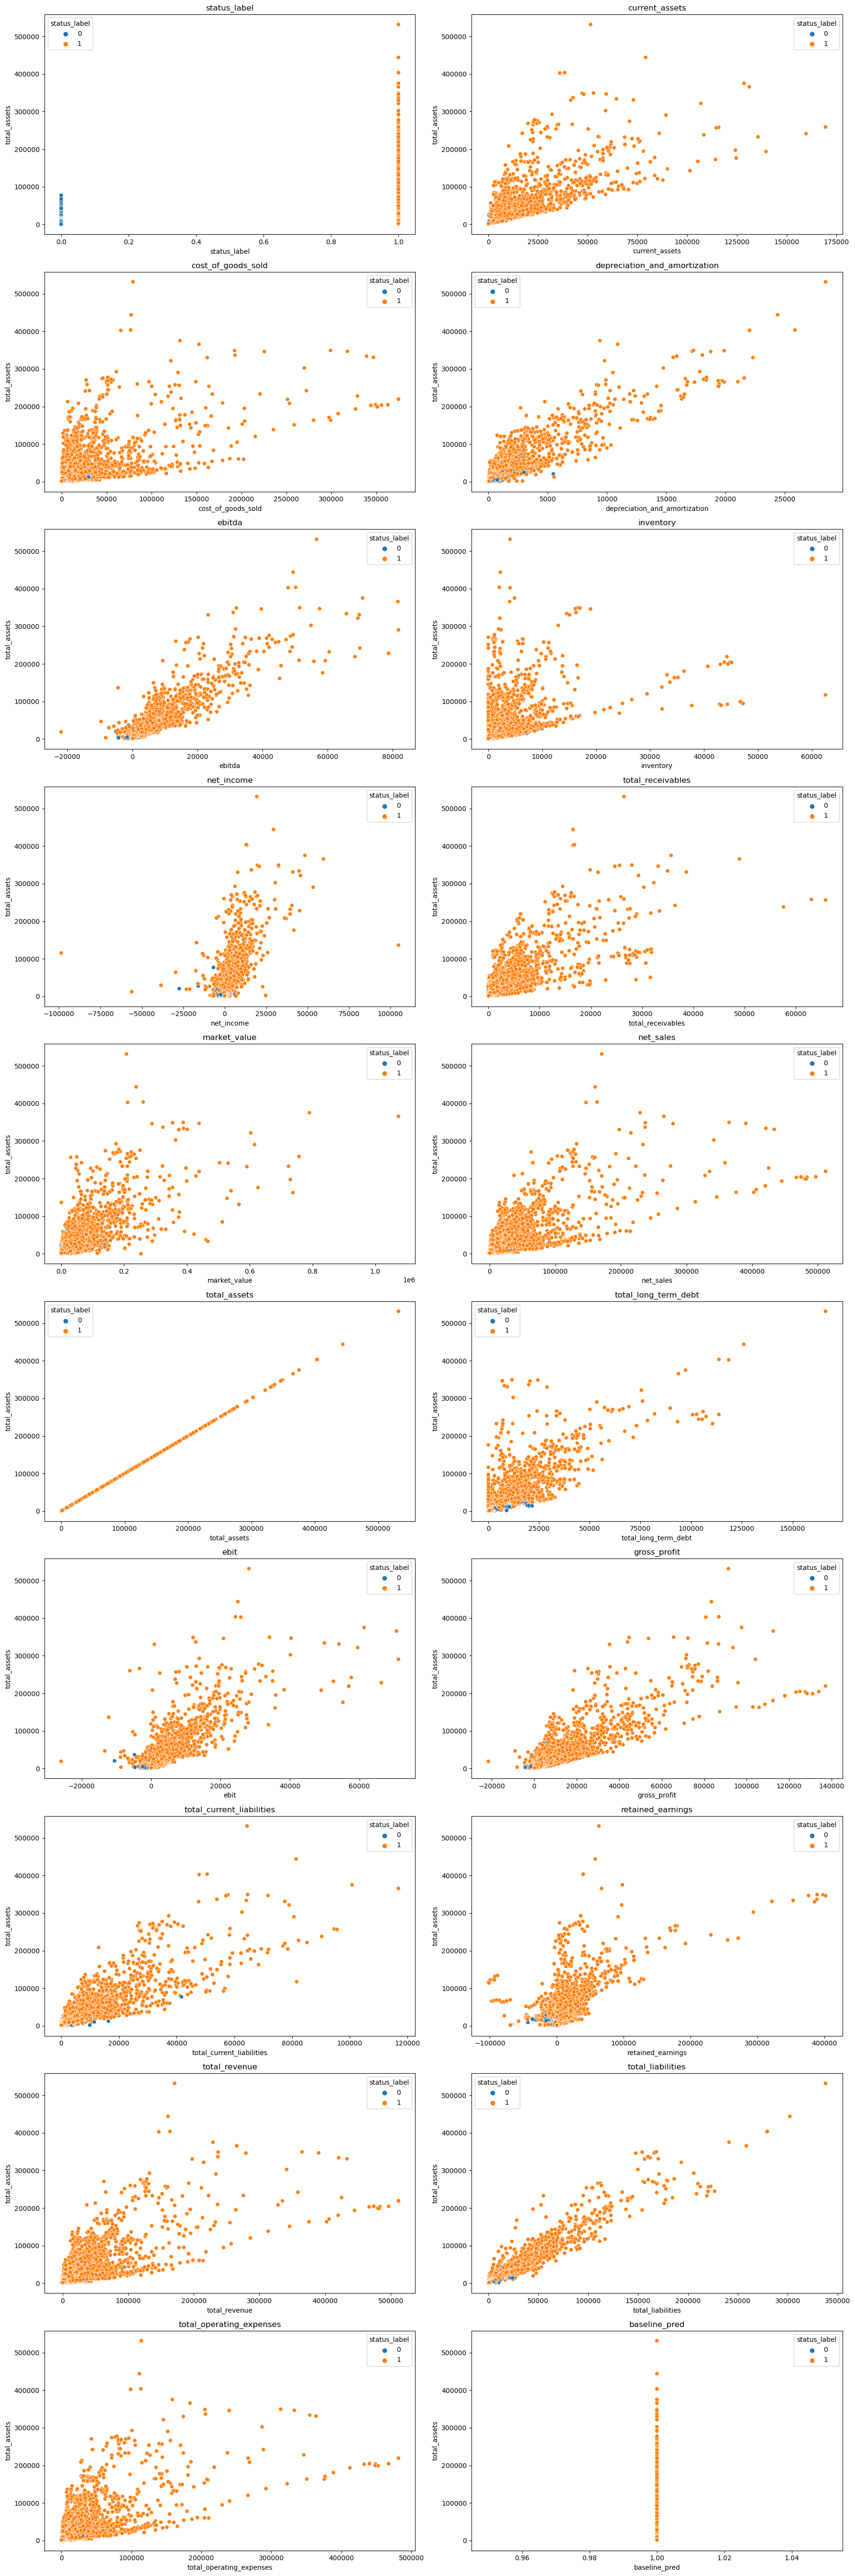

In [22]:
plt.figure(figsize=(18,54))

# Number of rows and columns for subplot layout
nrows = int(np.ceil(len(quant_vars) / 2))
ncols = 2

for i, col in enumerate(quant_vars):
    plt.subplot(nrows, ncols, i+1)
    sns.scatterplot(x=col, y='total_assets', hue='status_label', data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
e.explore_multivariate(tr, target, cat_vars, quant_vars)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1469d4310> (for post_execute):


KeyboardInterrupt: 

In [ ]:
for cat in categorical_cols:
    if df[cat].nunique() < 10:
        for num in numerical_cols:
            plt.figure(figsize=(8, 6))
            sns.violinplot(x=cat, y=num, hue='status_label', data=df)
            plt.title(f'{num} vs {cat} by status_label')
            plt.xticks(rotation=45)
    plt.show()

In [ ]:
for cat in categorical_cols:
    if df[cat].nunique() < 10:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x='status_label', y=cat, hue='status_label', data=df)
        plt.title(f'status_label vs {cat}')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
for quant in quant_vars[2:]:
    _, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4), sharey=True)
    for i, cat in enumerate(cat_vars):
        sns.violinplot(x=cat, y=quant, data=tr, split=True,
                       ax=ax, hue=target, palette="Set2")
        ax.set_xlabel('')
        ax.set_ylabel(quant)
        ax.set_title(cat)
    plt.show()

In [ ]:
e.plot_all_continuous_vars(tr, target, quant_vars)

In [ ]:
e.subplot_all_continuous_vars(tr, target, quant_vars)

## Question 1: How has the number of bankruptcies changed over the years?

In [ ]:
e.bankruptcies_per_year(df)

### Analyze the number of bankruptcies over the years

<div class="alert alert-block alert-info"> 
<b>Summarize</b>

- The line plot shows a clear trend of declining bankruptcies over the years. This suggests that the financial health of companies, or at least their ability to avoid bankruptcy, has generally improved over the time period covered in the dataset.

- The trend of declining bankruptcies could be influenced by a variety of factors, such as changes in economic conditions, industry dynamics, regulatory environment, or company management practices. Further analysis would be needed to understand the drivers behind this trend.

- While the visualization provides a clear picture of the trend, it's important to note that it doesn't provide statistical evidence of the trend. For that, a formal statistical test would be needed.
    
- The status_label is indeed a categorical variable, as it represents two categories: bankruptcy (1) and operating normally (0).
    
- The year, is technically a discrete numerical variable, as it represents specific points in time. However, in many analyses, year is often treated as a categorical variable because it represents distinct periods or events, and it's not usually meaningful to perform numerical operations on it (like taking an average of years, for example).
</div>

- $H_0$: There is no relationship between the year and the bankruptcy status. They are independent.
- $H_a$: There is a relationship between the year and the bankruptcy status. They are not independent.
- $\alpha$ = .05
    - Utilize Chi2-square contingency test - we are comparing categorical variables, comparison of groups

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = e.chi2_test(df)

In [ ]:
e.eval_results(p, alpha, group1='status_label', group2='year')

### Summarize question 1 Chi-square test

<div class="alert alert-block alert-success"> 
<b>Summarize</b>
    
The Chi-Square test for independence was successfully performed. The p-value obtained is approximately 8.73e-143, which is significantly less than 0.05. This means that we reject the null hypothesis that the bankruptcy status and year are independent. There is a statistically significant relationship between the year and the bankruptcy status.
</div>

## Question 2: How do the total assets and total liabilities compare between bankrupt and non-bankrupt companies?

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.info()

In [ ]:
sns.scatterplot(x='market_value', y='total_assets', hue='status_label', data=df)

### Analyze "a" vs "b" with stats

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
# get the stats from a pearsonr test on bankruptcies over the years
r, p = spearmanr(df.year, df.status_label)

Hₐ: There is a Monotonic relationship between X and Y.

In [ ]:
a = .05

if p < a:
    print(f"""We reject H₀, there is a monotonic relationship
    Spearman's r: {r:2f}.
    P-value: {p}""")
else:
    print(f"""We fail to reject H₀: that there is a monotonic relationship. 
    Spearman's r: {r:2f} 
    P-value: {p}""")

### Summarize

<div class="alert alert-block alert-info"> <b>Summarize</b>
       notes
 </div>

## Question 3: Are there any financial indicators that are significantly different between the companies that are alive and those that are bankrupt?

In [ ]:
df.status_label.value_counts()

In [ ]:
# Question 3: Are there any financial indicators that are significantly different between the companies that are alive and those that are bankrupt?
from scipy.stats import ttest_ind

# alive = df[df['status_label'] == 1]
# bankrupt = df[df['status_label'] == 0]

t_stat, p_val = ttest_ind(1, 0, nan_policy='omit')
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

### Analyze "a" vs "b" with stats

### Summarize

## Question 4: Can we visualize the correlation between the different financial indicators and the status of the company?

### Analyze "a" vs "b" with stats

### Summarize

### Exploration Summary
-
-
-

### (As Required) Features I am moving to modeling with
1.
2.
3.
4.

or NONE

## Modeling

- Evaluation Metrics: I will use accuracy and recall as my evaluation metrics.

> For accuracy, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.9336.

> For recall, the value is also in the range 0-1; closer to 1.0 is better. This metric is particularly important for our task as it measures the model's ability to correctly identify companies that filed for bankruptcy, which is the minority class in our dataset.
- The baseline prediction is that all companies will not file for bankruptcy, as this is the majority class in our dataset.
- I will evaluate four different model types: Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, and Decision Tree.
- Models will be evaluated on train, validate and test data.
- The model that performs the best on the test data, considering both accuracy and recall, will be selected as the final model. The interpretability of the model will also be considered in the final selection.

In [ ]:
baseline_accuracy = (df.baseline_pred == df.status_label).mean()
baseline_accuracy

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
The baseline for the target variable 'status_label' is approximately 0.9336. This means that if we were to make a model that always predicts the majority class (in this case, '1' or 'alive'), it would be correct approximately 93.36% of the time. This is our baseline accuracy.
 </div>

### Logistic Regression model

<div class="alert alert-block alert-success"> 
<b>NOTE</b>
    
   We'll start with a simple Logistic Regression model.
</div>

In [ ]:
# Train a Logistic Regression model
logit = m.logistic_regression(X_tr, y_tr, X_val, y_val)

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
The Logistic Regression model that we trained has an accuracy of 0.93 on the validation set, which is very close to the baseline accuracy. This suggests that the model is not yet providing a significant improvement over a naive model that always predicts the majority class.
 </div>

### K-Nearest Neighbors (KNN) model

<div class="alert alert-block alert-success"> 
<b>NOTE</b>
    
   The K-Nearest Neighbors (KNN) model with 5 neighbors has been trained. Here's the classification report on the validation set:
</div>

In [ ]:
# Train a KNN model
knn = m.knn(X_tr, y_tr, X_val, y_val, n_neighbors=5)

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
The KNN model has an accuracy of 0.94 on the validation set, which is slightly higher than the baseline accuracy of 0.9336. However, the recall for the minority class (0 or 'failed') is quite low, suggesting that the model is not very good at identifying companies that failed.
 </div>

### Random Forest model

<div class="alert alert-block alert-success"> 
<b>NOTE</b>

   The Random Forest model with 100 trees has been trained. Here's the classification report on the validation set:
</div>

In [ ]:
# Train a Random Forest model
rf = m.random_forest(X_tr, y_tr, X_val, y_val, n_estimators=100)

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
The Random Forest model has an accuracy of 0.94 on the validation set, which is slightly higher than the baseline accuracy of 0.9336. However, similar to the KNN model, the recall for the minority class (0 or 'failed') is quite low, suggesting that the model is not very good at identifying companies that failed.
 </div>

### Decision Tree model

<div class="alert alert-block alert-success"> 
<b>NOTE</b>

   Here's the classification report on the validation set:
</div>

In [ ]:
# Train a Decision Tree model
dt = m.decision_tree(X_tr, y_tr, X_val, y_val, max_depth=5)

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
The Decision Tree model has an accuracy of 0.93 on the validation set, which is similar to the baseline accuracy of 0.9336. However, similar to the previous models, the recall for the minority class (0 or 'failed') is quite low, suggesting that the model is not very good at identifying companies that failed.
 </div>

### Comparing Models Summary
**Logistic Regression***: This is a simple and fast model that works well when the relationship between the features and the target variable is approximately linear. It provides probabilities for the outcomes, which can be useful in many business contexts. However, it may not perform well when there are complex, non-linear relationships in the data.

***K-Nearest Neighbors (KNN)***: This model performed similarly to the baseline, with an accuracy of 0.93. However, it struggled to identify the minority class (companies that failed). KNN is a non-parametric model that can capture complex patterns in the data, but it can be sensitive to irrelevant features and may not perform well on imbalanced datasets.

***Random Forest***: This is an ensemble model that builds multiple decision trees and combines their predictions. It can capture complex, non-linear relationships in the data and provides a measure of feature importance. However, it can be computationally intensive and may overfit the training data if not properly tuned.

***Decision Tree***: The Decision Tree model we trained had an accuracy of 0.93, similar to the baseline. Like KNN, it struggled to identify the minority class. Decision Trees are easy to interpret and can handle both numerical and categorical variables, but they can easily overfit the training data if not properly pruned.

In summary, all the models have their strengths and weaknesses, and the best model depends on the specific characteristics of the data and the business context. In this case, all the models we trained struggled with the imbalanced nature of the dataset. Techniques such as oversampling the minority class, undersampling the majority class, or using different evaluation metrics could be used to address this issue.

### Best Model on Test

Based on the results we have, all the models (Line Regression, K-Nearest Neighbors, and Decision Tree) performed similarly in terms of accuracy, achieving around 0.93 which is close to the baseline accuracy of 0.9336. However, they all struggled with identifying the minority class (companies that failed), as indicated by the low recall for this class.

In terms of interpretability, the Decision Tree model might be considered the best as it provides clear rules that can be followed to understand the predictions. This can be particularly useful in business contexts where interpretability is important.

However, in terms of overall performance on this specific task (predicting company failure), none of the models stood out as they all had difficulty identifying the minority class. This is a common challenge in imbalanced classification problems.

In [ ]:
m. evaluate_models(X_tr, y_tr, X_ts, y_ts)

<div class="alert alert-block alert-info"> <b>Summarize</b>
    
From these reports, we can see that the K-Nearest Neighbors and Random Forest models have the highest accuracy scores on the test data, both achieving an accuracy of 94%. However, the Random Forest model has a higher precision for the minority class (0), which could be important depending on the specific business context and the cost associated with misclassifying bankrupt companies as non-bankrupt.
 </div>

## Modeling Summary

Four different models were trained and evaluated: Logistic Regression, K-Nearest Neighbors (KNN), Random Forest, and Decision Tree. All models were trained on the training set and their performance was evaluated on the test set. No clear winner.

## Conclusions


All models achieved an accuracy of around 94% on the test data, which is close to the baseline accuracy of 93.36%. However, they all struggled with identifying the minority class (companies that filed for bankruptcy), as indicated by the low recall for this class in the classification reports.

In terms of interpretability, the Decision Tree model might be considered the best as it provides clear rules that can be followed to understand the predictions. This can be particularly useful in business contexts where interpretability is important.

However, in terms of overall performance on this specific task (predicting company bankruptcy), none of the models stood out as they all had difficulty identifying the minority class. This is a common challenge in imbalanced classification problems.

### Exploration
-
-

### Modeling
Model performance can often be improved with further tuning. For example, we could try adjusting the parameters of the models, or we could try different techniques to address the class imbalance, such as oversampling the minority class, undersampling the majority class, or using different evaluation metrics that give more importance to the minority class (like F1-score or AUC-ROC).

Finally, it's worth mentioning that the "best" model can depend on what you value most in your specific context. If interpretability is important, you might prefer a Decision Tree. If you're looking for the best possible performance and have more time and computational resources, you might prefer a more complex model like Gradient Boosting or Support Vector Machine, and spend more time on tuning and addressing the class imbalance.

### Recommendations
-
-